In [35]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")

DATA_PATH = "../../data/raw/newtons_second_law_dataset.csv"

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Dataset not found at path: {DATA_PATH}")

In [36]:
df = pd.read_csv(DATA_PATH)

print(f"Dataset loaded: {df.shape[0]} rows x {df.shape[1]} columns")
df.head()

Dataset loaded: 3000 rows x 3 columns


,Mass_kg,Acceleration_ms2,Force_N
0,4.058131,13.486790,54.731161
1,9.531786,15.953960,152.069729
2,7.453942,5.084311,37.898163
3,6.187256,12.534995,77.557215
4,1.982177,11.477745,22.750923


In [37]:
missing = df.isnull().sum()

if missing.sum() == 0:
    print("No missing values found")
else:
    print("Missing values:\n", missing)
    
expected_columns = {'Mass_kg', 'Acceleration_ms2', 'Force_N'}

if not expected_columns.issubset(df.columns):
    raise ValueError(f"Missing expected columns. Found: {df.columns.tolist()}")

No missing values found


In [38]:
df['computed_force'] = df['Mass_kg'] * df['Acceleration_ms2']
df['abs_error'] = np.abs(df['computed_force'] - df['Force_N'])

max_error = df['abs_error'].max()
mean_error = df['abs_error'].mean()
tolerance = 1e-6

print(f"Max error: {max_error:.6e}")
print(f"Mean error: {mean_error:.6e}")

if max_error < tolerance:
    print("✅ Force values are physically consistent.")
else:
    print("⚠️ Force values show deviation beyond acceptable tolerance.")


Max error: 5.684342e-14
Mean error: 3.047530e-15
✅ Force values are physically consistent.


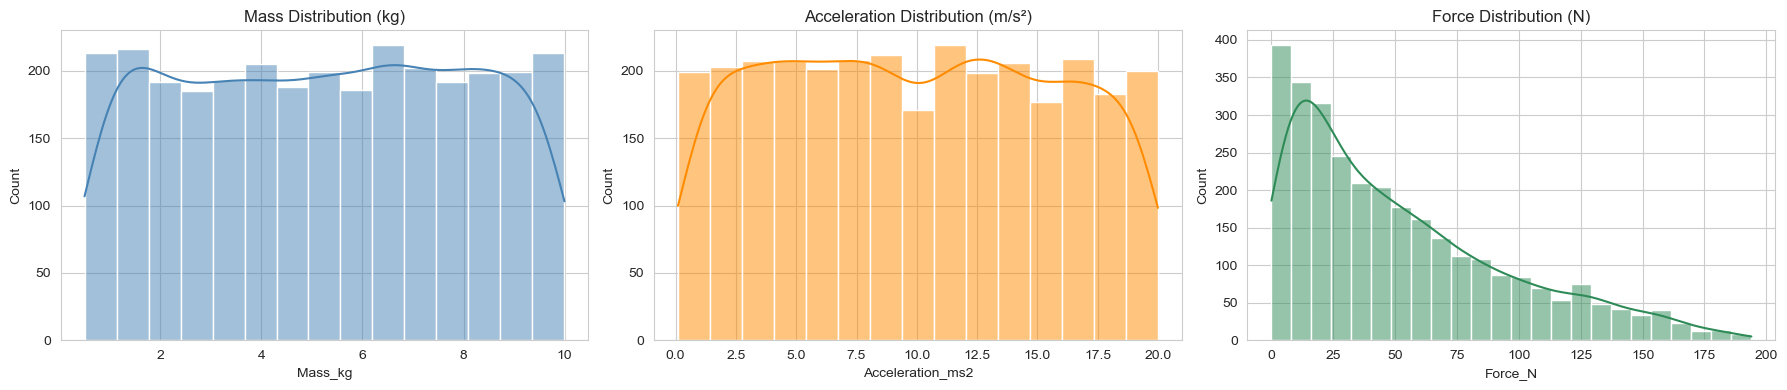

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

sns.histplot(df['Mass_kg'], kde=True, ax=axs[0], color='steelblue')
axs[0].set_title('Mass Distribution (kg)')

sns.histplot(df['Acceleration_ms2'], kde=True, ax=axs[1], color='darkorange')
axs[1].set_title('Acceleration Distribution (m/s²)')

sns.histplot(df['Force_N'], kde=True, ax=axs[2], color='seagreen')
axs[2].set_title('Force Distribution (N)')

plt.tight_layout()
plt.show()

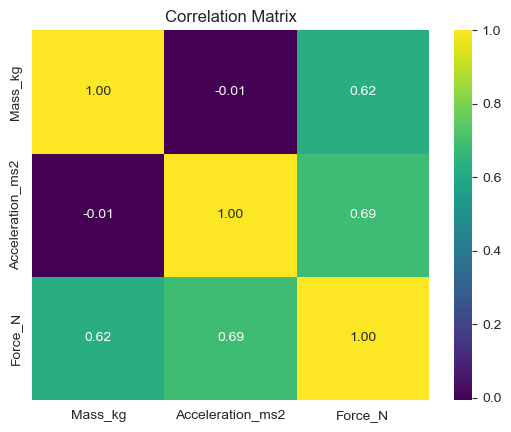

In [40]:
corr = df[['Mass_kg', 'Acceleration_ms2', 'Force_N']].corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()